# Classification with the _sklearn_ ML Framework

<div id="author"">
Chase Carlson<br>
GSCM 575 - ML in Business<br>
The School of Business<br>
Portland State University
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Get-and-Structure-Data" data-toc-modified-id="Get-and-Structure-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get and Structure Data</a></span></li><li><span><a href="#Grid-search:-Hyperparameter-tuning-with-cross-validation" data-toc-modified-id="Grid-search:-Hyperparameter-tuning-with-cross-validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Grid search: Hyperparameter tuning with cross-validation</a></span></li><li><span><a href="#Illustrate-the-Model" data-toc-modified-id="Illustrate-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Illustrate the Model</a></span></li><li><span><a href="#Apply-the-Model" data-toc-modified-id="Apply-the-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Apply the Model</a></span></li></ul></div>

## Preliminaries

Import datetime

In [307]:
from datetime import datetime as dt
now = dt.now()
print('Analysis on', now.strftime("%Y-%m-%d"), 'at', now.strftime("%H:%M %p"))

Analysis on 2023-08-03 at 14:53 PM


Establish current working directory.

In [308]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import libraries.

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

A classic application of supervised machine learning classification is customer churn. The ability to successfully forecast a customer of a company's services and products about to no longer be a customer allows the company to commit resources to attempt to salvage the relationship. 

The following data file contains information on over 7000 customers of a telecom service, including former customers who left the service plan within the last 30 days the data was collected. 

Data: http://web.pdx.edu/~gerbing/data/churn_clean.csv

The data has been cleaned according to the analysis for last week, so no need to repeat the cleaning process, or the data exploration. 


## Get and Structure Data

*a. Read the cleaned data into a data frame, and display its dimensions.*

In [311]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/churn_clean.csv')
df.shape

(7032, 10)

The data frame has 7,032 rows and 10 columns.

*b. Display the variable names and the first six rows of data.*

In [312]:
df.head(6)

,Charges,TotalCharges,MtoM,Paperless,Check,Phone,tenure,Dependents,Internet,Churn
0,29.85,29.85,1,1,0,0,1,0,0,0
1,56.95,1889.50,0,0,1,1,34,0,0,0
2,53.85,108.15,1,1,1,1,2,0,0,1
3,42.30,1840.75,0,0,0,0,45,0,0,0
4,70.70,151.65,1,1,0,1,2,0,0,1
5,99.65,820.50,1,1,0,1,8,0,0,1


Rename 'tenure' column with capital 'T' to be consistent with other columns:

In [313]:
df.rename(columns={'tenure': 'Tenure'}, inplace=True)
df.head()

,Charges,TotalCharges,MtoM,Paperless,Check,Phone,Tenure,Dependents,Internet,Churn
0,29.85,29.85,1,1,0,0,1,0,0,0
1,56.95,1889.50,0,0,1,1,34,0,0,0
2,53.85,108.15,1,1,1,1,2,0,0,1
3,42.30,1840.75,0,0,0,0,45,0,0,0
4,70.70,151.65,1,1,0,1,2,0,0,1


*c. Score 1 for Churn. Create the lists of the names of _classes_ and _features_ for the graph later on, then create the data structures from these names.*

In [314]:
classes = ['Churn_no', 'Churn_yes']
features = ['Charges', 'TotalCharges', 'MtoM', 'Paperless', 'Check', 
            'Phone', 'Tenure', 'Dependents', 'Internet']
X = df[features]
y = df['Churn']

Confirm the 1s are Churn and the 0s are not churn using countplot() to view the distribution. Churn customers should be much smaller than non-churn:

<Axes: xlabel='Churn', ylabel='count'>

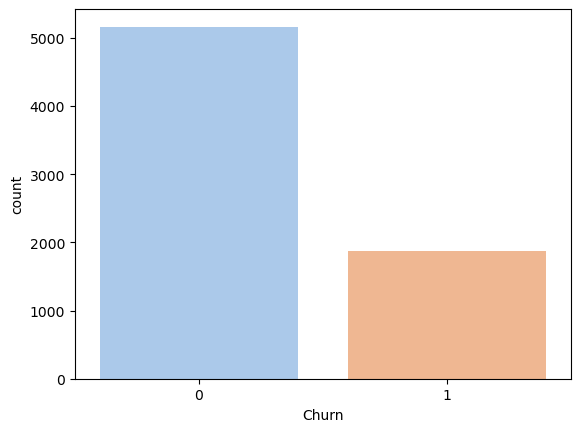

In [315]:
sns.countplot(df, x = 'Churn', palette='pastel')

*d. Do a MinMax transformation to get all data into a 0 to 1 range. Verify.*

In [316]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [317]:
scaled_cols = ['Charges', 'TotalCharges', 'Tenure']
df[scaled_cols] = mm_scaler.fit_transform(df[scaled_cols])
df.head()

,Charges,TotalCharges,MtoM,Paperless,Check,Phone,Tenure,Dependents,Internet,Churn
0,0.115423,0.001275,1,1,0,0,0.000000,0,0,0
1,0.385075,0.215867,0,0,1,1,0.464789,0,0,0
2,0.354229,0.010310,1,1,1,1,0.014085,0,0,1
3,0.239303,0.210241,0,0,0,0,0.619718,0,0,0
4,0.521891,0.015330,1,1,0,1,0.014085,0,0,1


Confirm MinMax transformation:

In [318]:
print("Min Values:")
print(df[['Charges', 'TotalCharges', 'Tenure']].min(), "\n")
print("Max Values:")
print(df[['Charges', 'TotalCharges', 'Tenure']].max())

Min Values:
Charges         0.0
TotalCharges    0.0
Tenure          0.0
dtype: float64 

Max Values:
Charges         1.0
TotalCharges    1.0
Tenure          1.0
dtype: float64


Reestablish feature and target data structures post-MinMax transformation:

In [319]:
classes = ['Churn_no', 'Churn_yes']
features = ['Charges', 'TotalCharges', 'MtoM', 'Paperless', 'Check', 
            'Phone', 'Tenure', 'Dependents', 'Internet']
X = df[features]
y = df['Churn']

## Grid search: Hyperparameter tuning with cross-validation

*e. Do a grid search with a 3-fold cross-validation. Search on the following parameters and values: maximum depth with values of 3 and 4, and maximum features with values of 4, 6, and 8.*

Access the decision tree solution algorithm and instantiate with a maximum depth of 4 using DecisionTreeClassifier.

In [320]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model

DecisionTreeClassifier(max_depth=4)

Access KFold cross-validation algorithm and GridSearchCV and create the model:

In [321]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=3, shuffle=True, random_state=1)

params = {'max_depth': [3, 4],
          'max_features': [4, 6, 8]}
grid_search = GridSearchCV(dt_model, param_grid=params, cv=kf,
                           scoring=('accuracy', 'recall', 'precision'),
                           refit=False, return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [3, 4], 'max_features': [4, 6, 8]},
             refit=False, return_train_score=True,
             scoring=('accuracy', 'recall', 'precision'))

*f. Display all the results of the cross-validation grid search.*

In [322]:
df_results = pd.DataFrame(grid_search.cv_results_).round(3)
df_results = df_results.drop(['params'], axis='columns')
df_results.transpose()

,0,1,2,3,4,5
mean_fit_time,0.002,0.003,0.003,0.002,0.003,0.004
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.002,0.002,0.002,0.002,0.002,0.002
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0
param_max_depth,3,3,3,4,4,4
param_max_features,4,6,8,4,6,8
split0_test_accuracy,0.774,0.797,0.797,0.794,0.796,0.796
split1_test_accuracy,0.747,0.779,0.781,0.76,0.779,0.788
split2_test_accuracy,0.771,0.781,0.778,0.771,0.77,0.784
mean_test_accuracy,0.764,0.786,0.785,0.775,0.782,0.789


*g. Display the most relevant results, the means.*

Reduce the results to just the desired columns and rename for readability:

In [323]:
df_summary = df_results[['param_max_depth', 'param_max_features',
'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 
'mean_train_accuracy','mean_train_recall', 'mean_train_precision']]
df_summary = df_summary.rename(columns= {
'param_max_depth': 'depth',
'param_max_features': 'features',
'mean_test_accuracy': 'test_accuracy',
'mean_test_recall': 'test_recall',
'mean_test_precision': 'test_precision',
'mean_train_accuracy': 'train_accuracy',
'mean_train_recall': 'train_recall',
'mean_train_precision': 'train_precision'})
df_summary

,depth,features,test_accuracy,test_recall,test_precision,train_accuracy,train_recall,train_precision
0,3,4,0.764,0.422,0.599,0.766,0.444,0.596
1,3,6,0.786,0.387,0.667,0.786,0.390,0.668
2,3,8,0.785,0.378,0.671,0.787,0.381,0.678
3,4,4,0.775,0.432,0.632,0.785,0.443,0.657
4,4,6,0.782,0.435,0.644,0.788,0.439,0.663
5,4,8,0.789,0.487,0.635,0.793,0.491,0.645


Calculate the variance between train_precision and test_precision for all folds:

In [324]:
df_summary['precision_variance'] = abs(df_summary['train_precision'] - df_summary['test_precision'])
df_summary

,depth,features,test_accuracy,test_recall,test_precision,train_accuracy,train_recall,train_precision,precision_variance
0,3,4,0.764,0.422,0.599,0.766,0.444,0.596,0.003
1,3,6,0.786,0.387,0.667,0.786,0.390,0.668,0.001
2,3,8,0.785,0.378,0.671,0.787,0.381,0.678,0.007
3,4,4,0.775,0.432,0.632,0.785,0.443,0.657,0.025
4,4,6,0.782,0.435,0.644,0.788,0.439,0.663,0.019
5,4,8,0.789,0.487,0.635,0.793,0.491,0.645,0.010


*h. Main management goal is to detect churners before they churn, which means focus on avoiding false positives. So, focus on precision. Why is the model with a depth of 3 and 6 features a good model to choose?*

Based on the above information, the model with a depth of 3 and 6 features appears to be a good model to choose because it has one of the highest precision scores with the smallest variance between the training and testing data at 0.667 test_precision and 0.668 train_precision.

*i. Given sufficient fit, estimate the model on the full data set as the best estimates are generally obtained with the most data.*

In [325]:
dt_model = DecisionTreeClassifier(max_depth=3, max_features=6)
mf = dt_model.fit(X,y)

*j. Calculate $\hat y$.*

In [326]:
y_fit = dt_model.predict(X)
y_fit

array([0, 0, 0, ..., 0, 1, 0])

Check results in confusion matrix:

In [327]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y, y_fit))

,0,1
0,4763,400
1,1116,753


## Illustrate the Model

*k. Draw the tree diagram.*

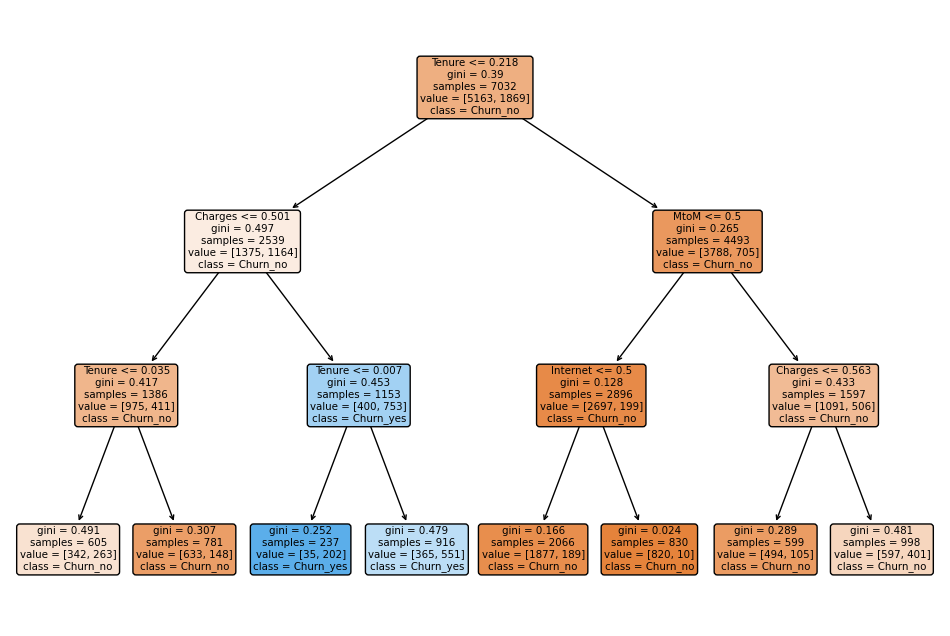

In [328]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(mf, feature_names=features, class_names=classes, 
               rounded=True, filled=True)
plt.savefig('dt_Churn.png')

*l. Focus on specific leaves.*

- *Specify the decision rules that does the best job of detecting churners.*<br></br>
The leaf that does the best job of detecting churners is the leaf third from the left with 202 correctly classified as churn_yes, or 85.23% of total observations.<br></br>
- *Specify the decision rules that does the worst job in the sense of too many false positives.*<br></br>
The leaf that does the worst job in the sense of too many false positives is the leaf fourth from the left, with 39.85% (365 people) misclassified as positive

## Apply the Model

*m. Apply the model to a person who has the following scores.*

- Charges = 45
- TotalCharges = 45
- MtoM = 29
- Paperless = 1
- Check = 1
- Phone = 0
- tenure = 0 
- Dependents = 1
- Internet = 0

In [330]:
X.columns

Index(['Charges', 'TotalCharges', 'MtoM', 'Paperless', 'Check', 'Phone',
       'Tenure', 'Dependents', 'Internet'],
      dtype='object')

Add the new data and view it in a data frame:

In [331]:
X_new = [[45,45,29,1,1,0,0,1,0]]
X_new = pd.DataFrame(X_new)
X_new.columns = X.columns
X_new

,Charges,TotalCharges,MtoM,Paperless,Check,Phone,Tenure,Dependents,Internet
0,45,45,29,1,1,0,0,1,0


Apply the model with the new data:

In [332]:
y_prob = dt_model.predict_proba(X_new)
print('Probability of Churn_no:', round(y_prob[0,0], 3))
print('Probability of Churn_yes', round(y_prob[0,1], 3))
y_new = dt_model.predict(X_new)
print('Predicted group membership:', y_new)

Probability of Churn_no: 0.148
Probability of Churn_yes 0.852
Predicted group membership: [1]


This customer has an 85.2% probability of churning, so they are labeled as Churn_yes.